In [1]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



In [2]:
df = pd.read_csv('lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


### Using lemonade.csv dataset and focusing on continuous variables:

### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

### Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [3]:
df_q = df.describe().T

In [4]:
df_q.drop(columns=['mean', 'count', 'std'], inplace=True)

In [5]:
df_q.columns = df_q.columns.str.replace("[%]", "")

In [6]:
df_q.rename(columns={'25': 'Q1', '50': 'Q2', '75': 'Q3'},inplace=True)

In [7]:
df_q['iqr']= df_q['Q3'] - df_q['Q1']

In [8]:
df_q['mild']= 1.5

In [9]:
df_q['extream']= 3

In [10]:
df_q['mild_upperbound']= df_q['Q3'] + (df_q.iqr*df_q.mild)

In [11]:
df_q['extream_upperbound']= df_q['Q3'] + (df_q.iqr*df_q.extream)

In [12]:
df_q['mild_lowerbound']= df_q['Q1'] - (df_q.iqr*df_q.mild)

In [13]:
df_q['extream_lowerbound']= df_q['Q1'] - (df_q.iqr*df_q.extream)

In [78]:
def get_outliers(df):
    '''
    Function takes in a data set and returns a data set with columns as rows.
    Each row will show quantile information as well as upper bound and lowerbound outliers.
    mild outliers calculated with multiplier of 1.5 extream use multiplier of 3
    '''
    
    # get transformation of describe of df
    df = df.describe().T
    
    # dropp useless columns
    df = df.drop(columns=['mean', 'count', 'std'])
    
    # replace % in column names
    df.columns = df.columns.str.replace("[%]", "")
    
    # rename columns
    df =df.rename(columns={'25': 'Q1', '50': 'Q2', '75': 'Q3'})
    
    # add column calculating the interquantile range
    df['iqr']= df['Q3'] - df['Q1']
    
    # add add column multiplyer for mild and extream values
    df['mild']= 1.5
    df['extream']= 3
    
    # add columns calculating upper and lower 'mild' outlire values
    df['mild_upperbound']= df['Q3'] + (df.iqr*df.mild)
    df['mild_lowerbound']= df['Q1'] - (df.iqr*df.mild)
    
    # add columns calculating the upper and lower 'extream' outlier values
    df['extream_upperbound']= df['Q3'] + (df.iqr*df.extream)
    df['extream_lowerbound']= df['Q1'] - (df.iqr*df.extream)
    
    # dropp 'multiplyer' columns to unclutter data frame
    df = df.drop(columns=['mild','extream'])
    
    return df

In [79]:
get_outliers(df)

,min,Q1,Q2,Q3,max,iqr,mild_upperbound,mild_lowerbound,extream_upperbound,extream_lowerbound
Temperature,15.1,49.70,61.10,71.70,212.0,22.00,104.7,16.70,137.70,-16.30
Rainfall,0.4,0.65,0.74,0.91,2.5,0.26,1.3,0.26,1.69,-0.13
Flyers,-38.0,31.00,39.00,49.00,80.0,18.00,76.0,4.00,103.00,-23.00
Price,0.5,0.50,0.50,0.50,0.5,0.00,0.5,0.50,0.50,0.50
Sales,7.0,20.00,25.00,30.00,534.0,10.00,45.0,5.00,60.00,-10.00


In [15]:
df.Rainfall.quantile(.5)
    

0.74

In [16]:
def get_lower_and_upper_bounds(series, multiplier):

    '''
    Function takes in a series and a multiplier and returns the upper bound and lower bound for outliers in that series
    '''
    s = series
    
    iqr = s.quantile(.75) - s.quantile(.25)
    
    upper_bound = s.quantile(.75) + (iqr*multiplier)
    
    lower_bound = s.quantile(.25) - (iqr*multiplier)
    
    return upper_bound, lower_bound
   





In [17]:
get_lower_and_upper_bounds(df.Rainfall, 1.5)

(1.3, 0.26)

In [21]:
get_lower_and_upper_bounds(df.Rainfall, 3)

(1.69, -0.13)

In [18]:
get_lower_and_upper_bounds(df.Temperature, 1.5)

(104.7, 16.700000000000003)

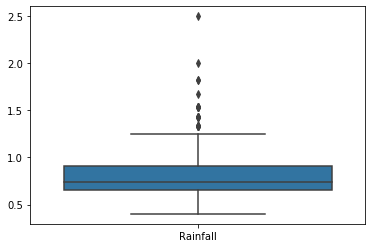

In [19]:
sns.boxplot(data=df[['Rainfall']])

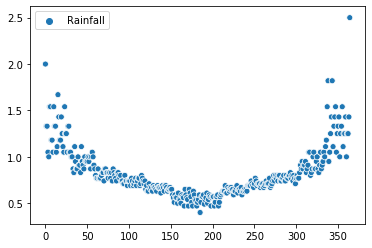

In [23]:
sns.scatterplot(data=df[['Rainfall']])

### Looks like 2 is best rule for outliers for Rainfall

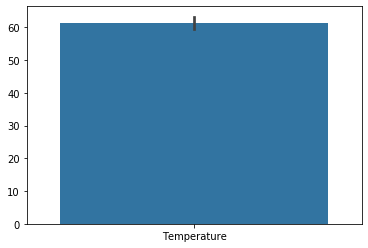

In [20]:
sns.barplot(data=df[['Temperature']])

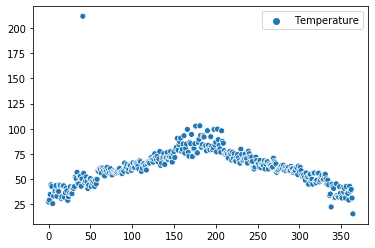

In [25]:
sns.scatterplot(data=df[['Temperature']])

### Looks like only one real outlier for Temperature 

# Identify if any columns in lemonade.csv are normally distributed.

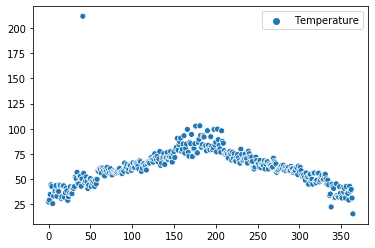

In [28]:
sns.scatterplot(data=df[['Temperature']])

In [33]:
print(str(df.Temperature.mean()) + ' ' + str(df.Temperature.mode()))

61.22465753424662 0    55.9
dtype: float64


## Normal Distribution

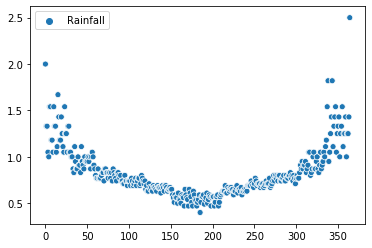

In [35]:
sns.scatterplot(data=df[['Rainfall']])

## Non-normal Distribution

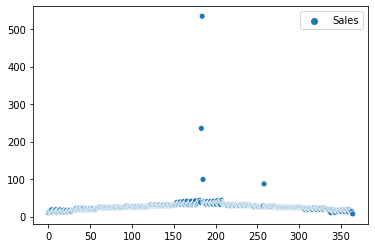

In [36]:
sns.scatterplot(data=df[['Sales']])

In [38]:
print(str(df.Temperature[df.Temperature < 100].mean()) + ' ' + str(df.Temperature[df.Temperature < 100].mode()))

60.578729281768005 0    55.9
dtype: float64


## Possible Normal Distribution

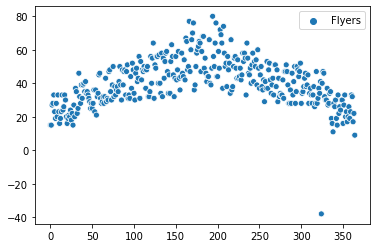

In [39]:
sns.scatterplot(data=df[['Flyers']])

## Normal Distribution

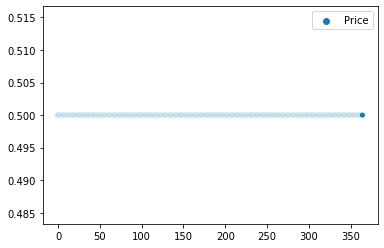

In [40]:
sns.scatterplot(data=df[['Price']])

## Non-normal distribution

# Temperature, Sales, and Flyers appear to be normally distributed

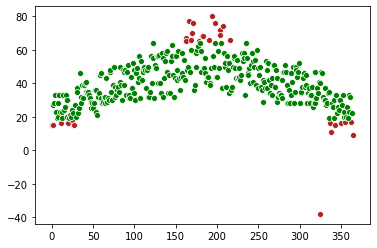

In [52]:
sns.scatterplot(data=df.Flyers[(df.Flyers>=df.Flyers.quantile(.95)) | (df.Flyers<=df.Flyers.quantile(.05))],color='firebrick')

sns.scatterplot(data=df.Flyers[(df.Flyers<=df.Flyers.quantile(.95)) & (df.Flyers>=df.Flyers.quantile(.05))],color='green')

## Removal of outliers seems unnecessary

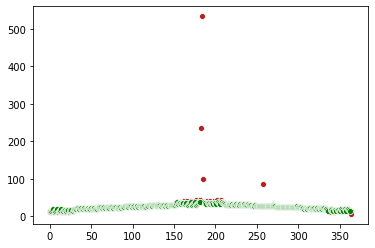

In [54]:
s = df.Sales

sns.scatterplot(data=s[(s>=s.quantile(.95)) | (s<=s.quantile(.05))],color='firebrick')
sns.scatterplot(data=s[(s<=s.quantile(.95)) & (s>=s.quantile(.05))],color='green')

## Got all of the outliers and some that I would keep

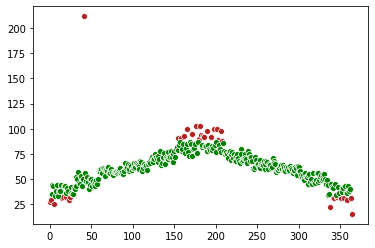

In [56]:
s = df.Temperature

sns.scatterplot(data=s[(s>=s.quantile(.95)) | (s<=s.quantile(.05))],color='firebrick')
sns.scatterplot(data=s[(s<=s.quantile(.95)) & (s>=s.quantile(.05))],color='green')

## Removal of outliers seems unnecessary

## Graphs of Three Sigma Outliers

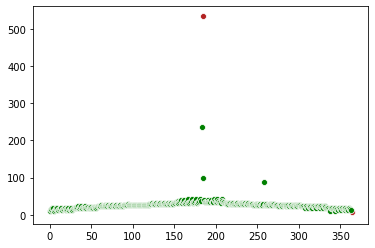

In [71]:
s = df.Sales
        
sns.scatterplot(data=s[(s>=s.quantile(.997300203936740)) | (s<=s.quantile(.002699796063259985))],color='firebrick')
sns.scatterplot(data=s[(s<=s.quantile(.997300203936740)) & (s>=s.quantile(.002699796063259985))],color='green')   

## Does not capture majority outliers

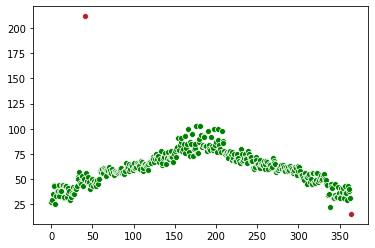

In [72]:
s = df.Temperature
        
sns.scatterplot(data=s[(s>=s.quantile(.997300203936740)) | (s<=s.quantile(.002699796063259985))],color='firebrick')
sns.scatterplot(data=s[(s<=s.quantile(.997300203936740)) & (s>=s.quantile(.002699796063259985))],color='green') 

## Captures Majority of Outliers

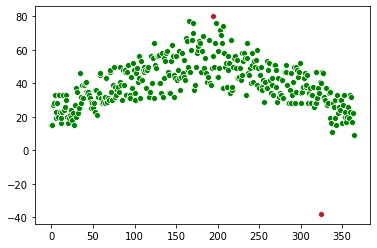

In [73]:
s = df.Flyers
        
sns.scatterplot(data=s[(s>=s.quantile(.997300203936740)) | (s<=s.quantile(.002699796063259985))],color='firebrick')
sns.scatterplot(data=s[(s<=s.quantile(.997300203936740)) & (s>=s.quantile(.002699796063259985))],color='green') 

## Captures one too many outliers

In [89]:
df = pd.read_csv('lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [90]:
df = df.drop(columns=['Day','Date'])

In [91]:
for column in df.columns:
    
    df[f'{column} 2sig'] = df[[f'{column}']][(df[[f'{column}']]<=df[[f'{column}']].quantile(.95)) & (df[[f'{column}']]>=df[[f'{column}']].quantile(.05))]

In [92]:
df.head()

,Temperature,Rainfall,Flyers,Price,Sales,Temperature 2sig,Rainfall 2sig,Flyers 2sig,Price 2sig,Sales 2sig
0,27.0,2.00,15,0.5,10,NaN,NaN,NaN,0.5,NaN
1,28.9,1.33,15,0.5,13,NaN,1.33,NaN,0.5,NaN
2,34.5,1.33,27,0.5,15,34.5,1.33,27.0,0.5,15.0
3,44.1,1.05,28,0.5,17,44.1,1.05,28.0,0.5,17.0
4,42.4,1.00,33,0.5,18,42.4,1.00,33.0,0.5,18.0
